# Clean And Analyze Employee Exit Surveys

we'll work with exit surveys from employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia.

**In this project, we want to know :**

 - Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?

 - Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

In [1]:
import pandas as pd 
dete_survey = pd.read_csv('dete_survey.csv',na_values='Not Stated')
tafe_survey = pd.read_csv('tafe_survey.csv')

In [2]:
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             788 non-null object
DETE Start Date                        749 non-null float64
Role Start Date                        724 non-null float64
Position                               817 non-null object
Classification                         455 non-null object
Region                                 717 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work envir

In [3]:
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [4]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null float64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                                                                                    701 non-

In [5]:
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [6]:
dete_survey_update = dete_survey[['ID','SeparationType','Cease Date','Position','DETE Start Date','Job dissatisfaction','Dissatisfaction with the department','Physical work environment','Lack of recognition','Lack of job security','Work location','Employment conditions','Work life balance','Workload','Age']].copy()
dete_survey_update.columns = dete_survey_update.columns.str.replace(' ','_').str.lower().str.strip()

In [7]:
dete_survey_update.columns

Index(['id', 'separationtype', 'cease_date', 'position', 'dete_start_date',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'work_life_balance', 'workload', 'age'],
      dtype='object')

**selecting relevent columns from tafe_survey dataframe and renamng them**

In [8]:
tafe_survey_update = tafe_survey[['Record ID','CESSATION YEAR','Reason for ceasing employment','Contributing Factors. Dissatisfaction','Contributing Factors. Job Dissatisfaction','CurrentAge. Current Age','LengthofServiceOverall. Overall Length of Service at Institute (in years)','LengthofServiceCurrent. Length of Service at current workplace (in years)','Classification. Classification']].copy()
tafe_survey_update.rename({'Record ID': 'id',
'CESSATION YEAR': 'cease_date',
'Reason for ceasing employment': 'separationtype',
'Gender. What is your Gender?': 'gender',
'CurrentAge. Current Age': 'age',
'Employment Type. Employment Type': 'employment_status',
'Classification. Classification': 'position',
'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'},inplace=True,axis=1)

**clening columns of dete_survey_update and creating an institute_service column which represent The employee's working period for the company
 **

In [9]:
dete_survey_update['cease_date'] = dete_survey_update['cease_date'].str.split('/').str[-1].astype(float)

In [10]:
dete_survey_update['institute_service'] = dete_survey_update['cease_date'] - dete_survey_update['dete_start_date']

**selecting only employees who resigned from the company**

In [11]:
dete_survey_update = dete_survey_update[dete_survey_update['separationtype'].str.startswith('Resignation')]

In [12]:
tafe_survey_update = tafe_survey_update[tafe_survey_update['separationtype']=='Resignation']

** making 2 funcations to filter the reason of resgin if it was job Dissatisfaction or not ** 

In [13]:
def co (ele) :
    if pd.isnull(ele) :
        pass
    elif ele == 'Job Dissatisfaction':
        return True
    else :
        return False
tafe_survey_update['Contributing Factors. Job Dissatisfaction'] = tafe_survey_update['Contributing Factors. Job Dissatisfaction'].str.strip()
tafe_survey_update['Contributing Factors. Job Dissatisfaction']=tafe_survey_update['Contributing Factors. Job Dissatisfaction'].apply(co)

In [14]:
def co2 (ele) :
    if pd.isnull(ele) :
        pass
    elif ele == 'Contributing Factors. Dissatisfaction':
        return True
    else :
        return False
tafe_survey_update['Contributing Factors. Dissatisfaction'] = tafe_survey_update['Contributing Factors. Dissatisfaction'].str.strip()
tafe_survey_update['Contributing Factors. Dissatisfaction']=tafe_survey_update['Contributing Factors. Dissatisfaction'].apply(co2)

In [15]:
tafe_survey_update['Contributing Factors. Dissatisfaction'].value_counts()

False    277
True      55
Name: Contributing Factors. Dissatisfaction, dtype: int64

** creating "dissatisfied" column in both dataframes which indicates if the resign was due to job Dissatisfaction or not **

In [16]:
dete_survey_update['dissatisfied'] = dete_survey_update[['job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security','work_location','employment_conditions','work_life_balance','workload']].any(axis=1,skipna=False)

In [17]:
tafe_survey_update['dissatisfied'] = tafe_survey_update[['Contributing Factors. Dissatisfaction','Contributing Factors. Job Dissatisfaction']].any(axis=1,skipna=False)

**after cleaning we will combine the two dataframes into 1 dataframe to make it easier for analysis**

In [18]:
tafe_survey_update['institute'] = 'TAFE'
dete_survey_update['institute'] = 'DETE'
combined = pd.concat([dete_survey_update,tafe_survey_update],ignore_index=True)

In [19]:
combined.notnull().sum().sort_values()

dete_start_date                              283
role_service                                 290
workload                                     311
work_life_balance                            311
physical_work_environment                    311
dissatisfaction_with_the_department          311
lack_of_recognition                          311
employment_conditions                        311
lack_of_job_security                         311
job_dissatisfaction                          311
work_location                                311
Contributing Factors. Dissatisfaction        332
Contributing Factors. Job Dissatisfaction    332
institute_service                            563
age                                          596
position                                     598
cease_date                                   635
dissatisfied                                 643
id                                           651
separationtype                               651
institute           

In [20]:
combined['institute_service'].shape

(651,)

In [21]:
combined['dissatisfied'].isnull().sum()

8

In [22]:
combined.loc[combined['institute_service'].astype(str).str.contains(r'[-a-zA-Z]'),'institute_service'].unique()

array([nan, '3-4', '7-10', '1-2', 'Less than 1 year', '11-20', '5-6',
       'More than 20 years'], dtype=object)

**Next, we'll clean the institute_service column and categorize employees according to the following definitions:**

 - New: Less than 3 years in the workplace
 - Experienced: 3-6 years in the workplace
 - Established: 7-10 years in the workplace
 - Veteran: 11 or more years in the workplace

In [23]:
def sep (ele) :
    if ele in [0,1,2,'1-2','Less than 1 year'] :
        return 'new'
    elif ele in [3,4,5,6,'3-4','5-6'] :
        return 'Experienced'
    elif ele in [7,8,9,10,11,'7-10'] :
        return 'Established'
    elif pd.notnull(ele):
        return 'Veteran'


In [24]:
updated_combined = combined.copy()
updated_combined['institute_service'] = updated_combined['institute_service'].apply(sep)
updated_combined['institute_service'].value_counts(dropna=False)

new            193
Experienced    172
Veteran        132
NaN             88
Established     66
Name: institute_service, dtype: int64

**now after cleaning data we will make some analysis to discuss the first question : **
 - Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?

In [25]:
resign1=updated_combined[['institute_service','dissatisfied']].copy()

In [26]:
resign1 = resign1.groupby('institute_service')['dissatisfied'].value_counts(normalize=True).unstack()*100
resign1.columns = ['False', 'True']

In [27]:
resign1

,False,True
institute_service,,
Established,48.484848,51.515152
Experienced,65.697674,34.302326
Veteran,51.515152,48.484848
new,70.466321,29.533679


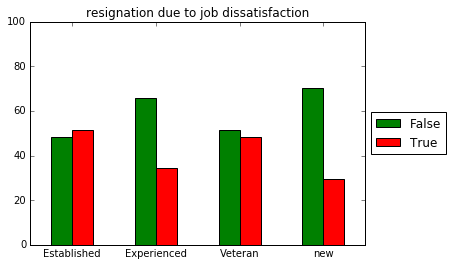

In [54]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
pos = np.arange(4) + 0.75
width = 0.25
fig , ax = plt.subplots()
plt.bar(pos,resign1['False'],width=width,color='green',label='False')
plt.bar(pos+width,resign1['True'],width=width,color='red',label='True')
plt.xticks(range(1,5))
ax.set_xticklabels(resign1.index)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_ylim(0,100)
ax.set_title('resignation due to job dissatisfaction')
plt.show()

** from the chart its clear that employees with 7 or more years of service are more likely to resign due to some kind of dissatisfaction with the job than employees with less than 7 years of service.**

In [29]:
updated_combined['age'].value_counts().sort_index()

20 or younger    10
21  25           33
21-25            29
26  30           32
26-30            35
31  35           32
31-35            29
36  40           32
36-40            41
41  45           45
41-45            48
46  50           39
46-50            42
51-55            71
56 or older      29
56-60            26
61 or older      23
Name: age, dtype: int64

**now we will clear age column and categorize employees according to the following definitions : **
 - young : less than 35 years-old
 - mature : 36-45 years-old
 - old : more than 45 years-old

In [30]:
updated_combined['age'] = updated_combined['age'].str.extract('(\d+)').astype(float)

updated_combined['age'].value_counts().sort_index()

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: FutureWarning:

currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)



20.0    10
21.0    62
26.0    67
31.0    61
36.0    73
41.0    93
46.0    81
51.0    71
56.0    55
61.0    23
Name: age, dtype: int64

In [31]:
def cats (ele) : 
    if ele <=35 : 
        return 'young'
    elif ele <= 45 :
        return 'mature'
    elif ele > 45 : 
        return 'old'
updated_combined['age'] = updated_combined['age'].apply(cats)

In [32]:
updated_combined['age'].value_counts()

old       230
young     200
mature    166
Name: age, dtype: int64

**now we will come to the secound qusetion and discover :**
 - Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

In [44]:
resign2 = updated_combined[['age','dissatisfied']].groupby('age')['dissatisfied'].value_counts(normalize=True).unstack()*100
resign2.columns = ['False','True']

In [45]:
resign2

,False,True
age,,
mature,63.855422,36.144578
old,59.130435,40.869565
young,64.000000,36.000000


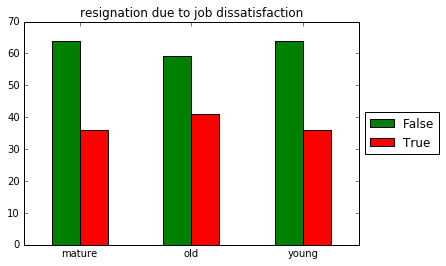

In [56]:
pos = np.arange(3)+.75
plt.bar(pos,resign2['False'],width=.25,color='green',label='False')
plt.bar(pos+.25,resign2['True'],width=.25,color='red',label='True')
plt.xticks(range(1,4),resign2.index)
plt.legend(loc='center left',bbox_to_anchor=(1, 0.5))
plt.title('resignation due to job dissatisfaction')
plt.show()

**from the chart its clear that The older the employee, the higher the rate of resignation due to job dissatisfaction**